In [7]:
import os, sys, copy, random, pickle
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState
from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.imgutils import (filter_pixels_circle, crop_img)

from modules.AnalysisHelpers import ( multiPlot, colorCube,
         SubprocColorCube, subprocColorCube, buildConfusionData, 
         buildConfusionPlotData, buildRegionMarkers, confusionPlotByViews,
         confusionPlotByImage, PixelConfusionMatrix, cvtPlot,
         applyTracker, presetCubeViews, bytesToPic,
         croppedPic, bytesToPic2, colorInRange)

from skimage.filters import sobel, gaussian, scharr, threshold_adaptive

from modules.IterThresh import iterThreshA
from modules.AnalysisHelpers import imgToColors, pointsToList

from modules.AnalysisHelpers import (applyTracker, roiSelectZoomWindow,
                                     roiSelectScoreWindow)
from modules.EvalHelpers import EvalTracker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DATA_DIR = "../data/misc/books/iterthresha-vizdebug-1/"

db_name = "interprocOrange.db"
gsDb = DBInterface(os.path.join(DATA_DIR, db_name))
listGSo = [ pickle.loads(d[1]) for d in gsDb.selectAll()]

print [_gs.frameCounter for _gs in listGSo]

col1, col2 = [], []

for _gs in listGSo:
    _gs.initDisplay()
    col1.append(_gs.getOrigFrame())
    col2.append(_gs.display.scoreFrame.copy())
    
chart_data = [col1, col2]

[0, 9, 78, 116, 136, 176, 195, 246, 307, 340]


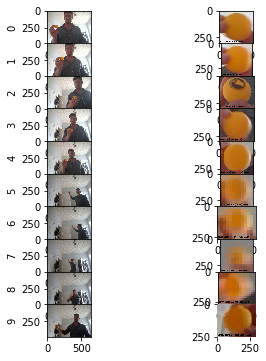

In [3]:
multiPlot(chart_data, hspace = 0, wspace = 0, figsize = (6,6), input_transform_titles = range(len(chart_data[0])),
         bGrid=True)

In [5]:
tracker = TrackFactory(on=True)

tracker.setInit(ballColor = "orange")

tracker.setAlgoEnum(1)

tracker.getTrackParams()

{'repair_iterations': 1,
 'thresh_hi': (64, 255, 255),
 'thresh_lo': (6, 30, 90),
 'threshes': [((6, 30, 90), (64, 255, 255)),
  ((64, 100, 110), (90, 255, 255)),
  ((90, 120, 130), (120, 255, 255))],
 'tracking_blur': 1}

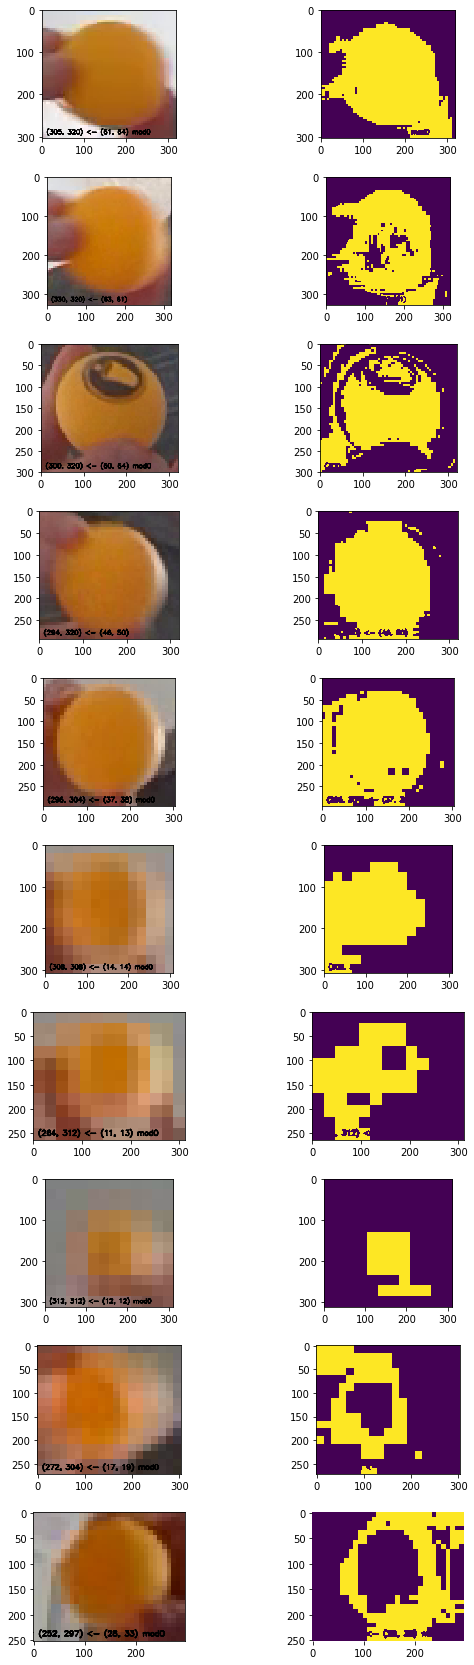

In [27]:
# Heightwise Plot
data = applyTracker(listGSo, tracker, roiSelectScoreWindow)
_data = data['listPlts']

frames = len(data['listPlts'])
viewsOfInterest = [0,3]

col1, col2 = [], []

for _frame in range(frames) :
        
    col1.append( _data[_frame][viewsOfInterest[0]] )

    col2.append( _data[_frame][viewsOfInterest[1]])
        
chart_data = [col1, col2]

multiPlot( chart_data
#           ,input_frame_titles = data['listTransformTitles']
#           ,input_transform_titles = data['listFrameTitles']
         ,wspace = 0 
         ,figsize = (10,30)
         )

In [29]:
tracker2 = TrackFactory(on=True)

tracker2.setInit(ballColor = "orange")

tracker2.setAlgoEnum(1)

tracker2.getTrackParams()

{'repair_iterations': 1,
 'thresh_hi': (64, 255, 255),
 'thresh_lo': (6, 30, 90),
 'threshes': [((6, 30, 90), (64, 255, 255)),
  ((64, 100, 110), (90, 255, 255)),
  ((90, 120, 130), (120, 255, 255))],
 'tracking_blur': 1}

In [30]:
tracker2.threshInitial = [(6, 30, 120), (64, 255, 255)]
tracker2.getTrackParams()

{'repair_iterations': 1,
 'thresh_hi': (64, 255, 255),
 'thresh_lo': (6, 30, 120),
 'threshes': [((6, 30, 90), (64, 255, 255)),
  ((64, 100, 110), (90, 255, 255)),
  ((90, 120, 130), (120, 255, 255))],
 'tracking_blur': 1}

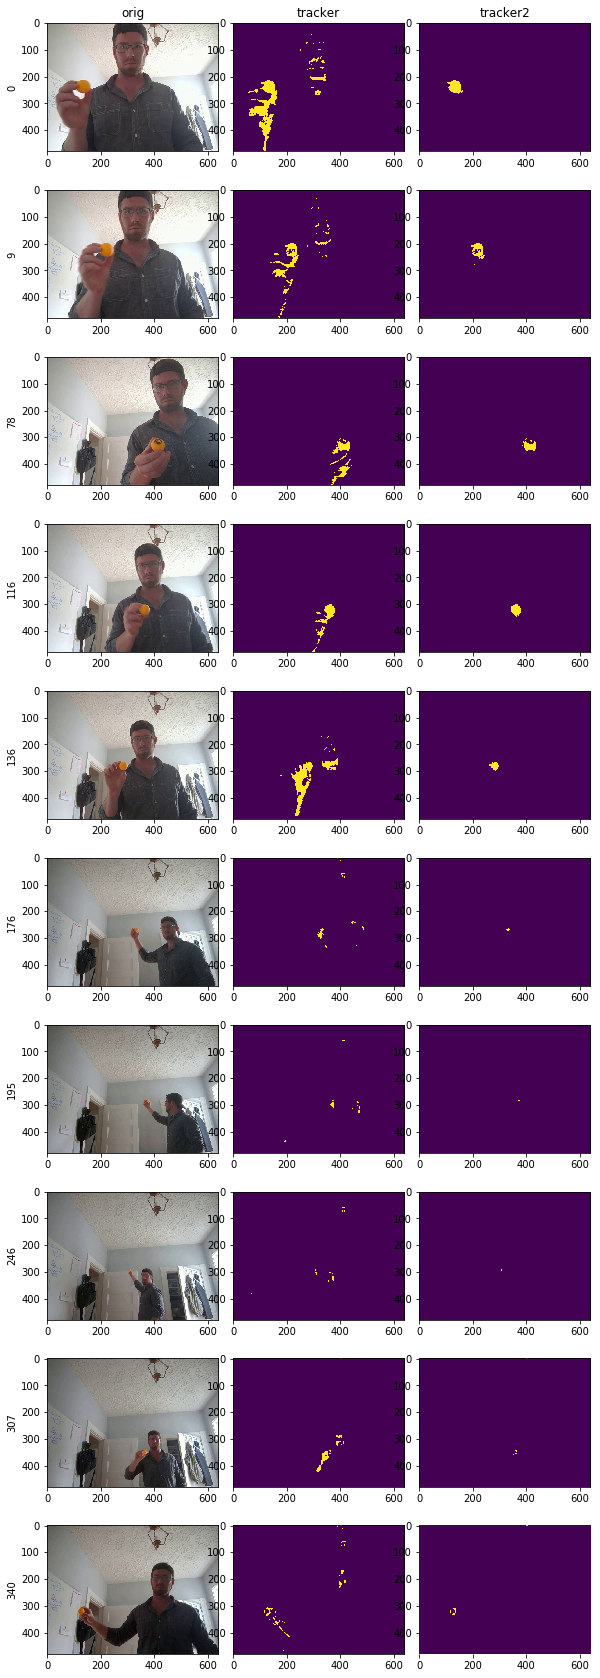

In [32]:
# Heightwise Plot
data = applyTracker(listGSo, tracker)
_data = data['listPlts']

data2 = applyTracker(listGSo, tracker2)
_data2 = data2['listPlts']

frames = len(data['listPlts'])
viewsOfInterest = [0,3]

col1, col2, col3 = [], [], []

for _frame in range(frames) :
        
    col1.append( _data[_frame][0] )

    col2.append( _data[_frame][3])
    
    col3.append( _data2[_frame][3])
        
chart_data = [col1, col2, col3]

multiPlot( chart_data
          ,input_frame_titles = ["orig", "tracker", "tracker2"]
          ,input_transform_titles = [_gs.frameCounter for _gs in listGSo]
         ,wspace = 0 
         ,figsize = (10,30)
         )